# Data Visualization

In [67]:
# change dir
import os
import sys

from sympy.codegen import Print
from sympy.codegen.fnodes import dimension

PROJECT_DIR = os.path.abspath(os.path.abspath('') + "/../..")
print(f"Changing directory to {PROJECT_DIR}")
os.chdir(PROJECT_DIR)


Changing directory to D:\


In [68]:
# load packages
import random
import numpy as np
import torch as th
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from basicts.utils import load_dataset_data, load_dataset_desc

## 1. Hyper-Parameter

In [69]:
# hyper-parameter
DATASET_NAME = "PEMS04"
# import basicts.utils.serialization as s
# print("实际加载的 serialization.py 路径：", s.__file__)

## 2. Read Data

In [70]:
data = load_dataset_data(DATASET_NAME)
desc = load_dataset_desc(DATASET_NAME)

print("data shape: {0}\n".format(data.shape))
print("data descriptipn:")
for key, value in desc.items():
    print(f"\t{key}: {value}")
print(data[:,:, 0])

data shape: (16992, 307, 3)

data descriptipn:
	name: PEMS04
	domain: traffic flow
	shape: [16992, 307, 3]
	num_time_steps: 16992
	num_nodes: 307
	num_features: 3
	feature_description: ['traffic flow', 'time of day', 'day of week']
	has_graph: True
	frequency (minutes): 5
	regular_settings: {'INPUT_LEN': 12, 'OUTPUT_LEN': 12, 'TRAIN_VAL_TEST_RATIO': [0.6, 0.2, 0.2], 'NORM_EACH_CHANNEL': False, 'RESCALE': True, 'METRICS': ['MAE', 'RMSE', 'MAPE'], 'NULL_VAL': 0.0}
[[62. 56. 90. ... 56. 48. 38.]
 [61. 40. 94. ... 51. 30. 35.]
 [71. 28. 79. ... 67. 31. 45.]
 ...
 [66. 76. 77. ... 85. 58. 57.]
 [77. 73. 96. ... 69. 52. 43.]
 [74. 71. 64. ... 80. 78. 40.]]


In [71]:
# 对data数据进行标准化，仅对交通流量进行标准化。
data1 = data.copy()
mean = 207.2369
std = 156.4841
data1[:, :, 0] = (data1[:, :, 0] - mean) / std
# 保存标准化后的数据，选取一个时间区间
data1 = data1[288 * 4 : 288 * 6, :, :]
np.savez('D:/PYTHON_PROJECT/BasicTS-master/tests/data1.npz', data=data1)
print("Data saved as 'data1.npz'")
print(data[:,:, 0])

Data saved as 'data1.npz'
[[62. 56. 90. ... 56. 48. 38.]
 [61. 40. 94. ... 51. 30. 35.]
 [71. 28. 79. ... 67. 31. 45.]
 ...
 [66. 76. 77. ... 85. 58. 57.]
 [77. 73. 96. ... 69. 52. 43.]
 [74. 71. 64. ... 80. 78. 40.]]


## 3. Plot Raw Data

In [72]:
def plot_raw_data(data: np.array, selected_node_id: int, begin_time: int = None, end_time: int = None, line_width: float = 1.5, font_size: int = 16, color="green", figure_size: tuple = (10, 5)):
    """plot raw data.

    Args:
        data (np.array): raw data with shape [num_time_slices, num_time_series, num_features].
        selected_node_id (int): selected time series.
        begin_time (int, optional): begin time. Defaults to None.
        end_time (int, optional): end time. Defaults to None.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        color (str, optional): color. Defaults to "green".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    plt.rcParams['figure.figsize'] = figure_size
    plot_data = data[begin_time:end_time, selected_node_id, 0]
    plot_index = np.arange(plot_data.shape[0])
    plt.plot(plot_index, plot_data.real, linewidth=line_width, color=color, label="raw data")
    plt.grid()
    plt.legend(fontsize=font_size)
    # plt.savefig('vis.eps',dpi=600,format='eps', transparent=True)
    plt.show()
    plt.clf()
    

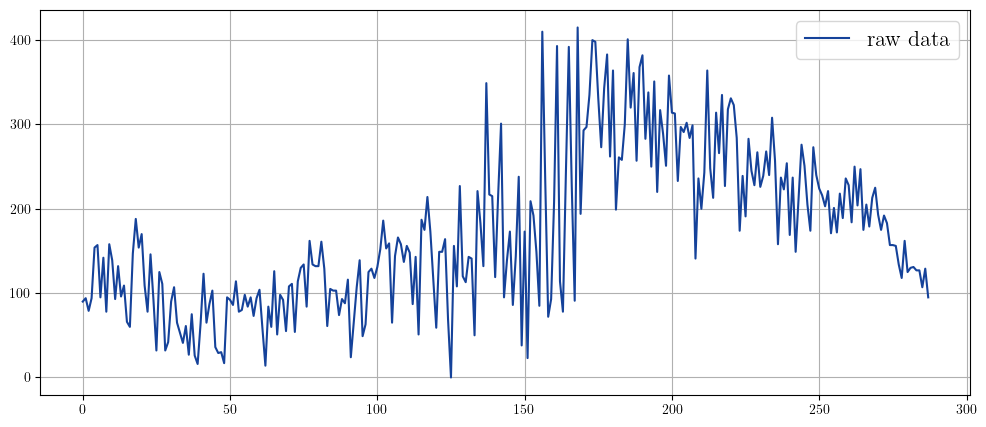

<Figure size 1200x500 with 0 Axes>

In [73]:
plot_raw_data(data=data, selected_node_id=2, begin_time=0, end_time=288 , line_width=1.5, font_size=16, color="#15429a", figure_size=(12, 5))

In [80]:
def plot_raw_data_multi_variable(data: np.array, node_ids: int, begin_time: int = None, end_time: int = None, line_width: float = 1.5, font_size: int = 16, figure_size: tuple = (10, 5)):
    """plot raw data.

    Args:
        data (np.array): raw data with shape [num_time_slices, num_time_series, num_features].
        selected_node_id (int): selected time series.
        begin_time (int, optional): begin time. Defaults to None.
        end_time (int, optional): end time. Defaults to None.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        color (str, optional): color. Defaults to "green".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    time_span = data.shape[0]
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'Times New Roman'
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    plt.rcParams['figure.figsize'] = figure_size
    for selected_node_id in node_ids:
        plot_data = data[begin_time:end_time, selected_node_id, 0]
        plot_index = np.arange(plot_data.shape[0])
        plt.plot(plot_index, plot_data, linewidth=line_width, label="Sensor: {0}".format(selected_node_id))
    # mid_index = (end_time - begin_time) // 2
    # plt.axvline(x=mid_index, color='red', linestyle='--', linewidth=1.2)
    xticks = [50, 200, 350]  # 需要自定义位置的刻度
    xticklabels = ['2018-01-05 4:50:00', '2018-01-05 16:40:00', '2018-01-06 6:10:00']
    for i, tick in enumerate(xticks):
        plt.axvline(x=tick, color='red', linestyle='--', linewidth=1)
        # Add label next to the red line
        # plt.text(tick, 0.95 * np.max(data[begin_time:end_time, node_ids[0], 0]), f'$\text{t}_{i+1}$', fontsize=font_size, ha='right', color='black')
    # for tick in xticks:
    #    plt.axvline(x=tick, color='red', linestyle='--', linewidth=1)
    plt.xticks(xticks, xticklabels)
    plt.ylabel('Flow')
    plt.grid()
    # plt.grid(False)
    plt.legend(fontsize=font_size)
    plt.savefig('C:/Users/PC/Desktop/2.png', bbox_inches='tight', pad_inches=0.1, dpi=600)
    plt.show()
    plt.clf()


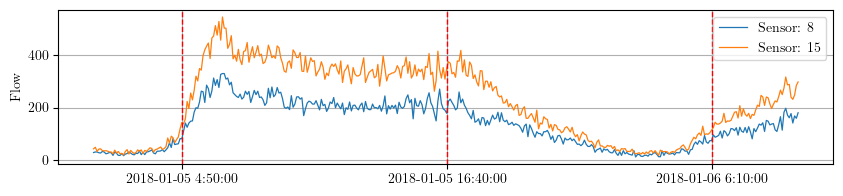

<Figure size 1000x200 with 0 Axes>

In [81]:

plot_raw_data_multi_variable(data=data, node_ids = [8, 15], begin_time=4*288, end_time= 4*288+400,  line_width=0.9, font_size=10,
                             figure_size=(10, 2))

# 13, 26
# 8,15

## 4. Plot Samples

In [9]:
def plot_sample(history_data: np.array, future_data: np.array, history_index: list, future_index: list, line_width: float = 1.5, font_size: int = 16, history_color="blue", future_color="red", figure_size: tuple = (10, 5)):
    plt.rcParams['figure.figsize'] = figure_size
    plt.plot(history_index, history_data, linewidth=line_width, color=history_color, label="history data")
    plt.plot(future_index, future_data, linewidth=line_width, color=future_color, label="future data")
    # lint two parts
    plt.plot([history_index[-1], future_index[0]], [history_data[-1], future_data[0]], linewidth=line_width, color=future_color)
    plt.grid()
    plt.legend(fontsize=font_size)
    plt.show()
    plt.clf()

In [10]:
# use regular settings
input_len = desc['regular_settings']['INPUT_LEN']
output_len = desc['regular_settings']['OUTPUT_LEN']

# manually set input & output length
input_len = 336
output_len = 336

random_index = random.randint(input_len, data.shape[0]-output_len)
random_node = random.randint(0, data.shape[1])

random_sample_history = data[random_index-input_len:random_index, random_node, 0]
random_sample_future = data[random_index:random_index+output_len, random_node, 0]

random_index_history = range(random_index-input_len, random_index)
random_index_future = range(random_index, random_index+output_len)


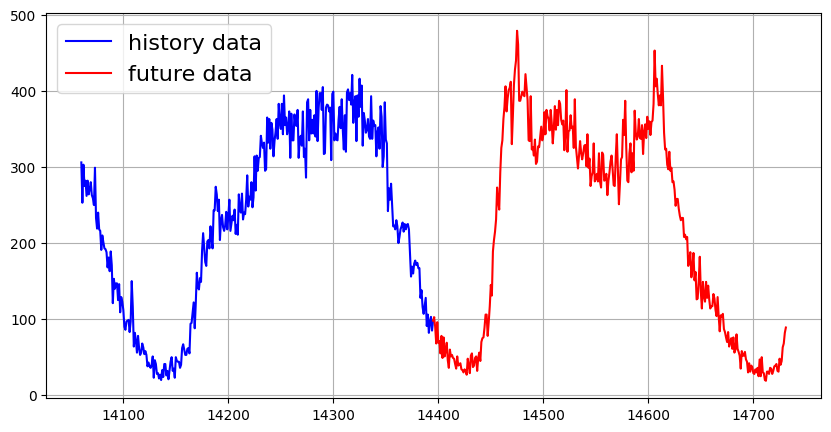

<Figure size 1000x500 with 0 Axes>

In [11]:
# hisotory_data: np.array, future_data: np.array, line_width: float = 1.5, font_size: int = 16, history_color="blue", future_color="red", figure_size: tuple = (10, 5)
plot_sample(history_data=random_sample_history, future_data=random_sample_future, history_index=random_index_history, future_index=random_index_future, line_width=1.5, font_size=16, history_color="blue", future_color="red", figure_size=(10, 5))